In [1]:
from substructure_classifier.substructure_classifier_development import SubstructureClassifier
import json
example_config=SubstructureClassifier.get_example_classifier_config()
print(json.dumps(example_config, indent=4))

example_config["classifier_name"]="test"

example_config["active_val_cats_live"]=[
    ["SIS_10e10_sub_val", "SingleTelescopeNoiseDataset", {
        "grid_width_arcsec":8.0,
        "grid_pixel_side":100,
        "broadcasting":False,
        "sky_level":0.05,
        "kernel_size":5,
        "kernel_sigma":1.0,
        "gain":100.0,

        }
    ]
]

example_config["NN_config"]={
        "num_classes":2
}


my_classifier = SubstructureClassifier("test", config_dict=example_config)

{
    "classifier_name": "test_classifier2",
    "NN_model": "ResNet50",
    "NN_config": {},
    "active_val_cats_live": [
        [
            "SIS_10e9_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ],
        [
            "SIS_10e8_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ]
    ]
}


FileExistsError: Classifier test already exists. Provide a different name or delete the existing classifier.

forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog conor_similar_cat_min_10e11_val_no_shear_small_high_conc.json already exists in active validation catalogs.
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog conor_similar_cat_min_10e11_val_no_shear_small_high_conc.json already exists in active validation catalogs.
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Using device: cuda
Currently this dataloader is calculating the images in float32
[DEBUG] parent_stage_id = 'a75d01fcc66ac59ef3663f8841a2cce0f9bea191e2d6e15d887e7f4eee4707e1'
[DEBUG] loading checkpoint from '/raven/u/fcitterio/master_thesis_code/trained_classifiers/test/stages/a75d01fcc66ac59ef3663f8841a2cce0f9bea191e2d6e15d887e7f4eee4707e1/trained_params.pth'
[DEBUG] before load: ‖conv1.weight‖ = 4.630945
[DEBUG] a

  0%|          | 0/4 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
📈  Suggested max_lr (lr_peak) ≈ 2.15e-02
📈  Suggested max_lr (lr_peak) ≈ 2.15e-02
authomatic learning rate, disregarding suggestion in the config
hardcoding lr_best


wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: francescocitterio99 (francescocitterio99-max-planck-society) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Tracked catalogs: ['SIS_10e10_sub_val', 'conor_similar_cat_min_10e11_val_no_shear_small_high_conc.json']


Epoch 1/1:   0%|          | 0/4 [00:00<?, ?batch/s]

Training_loss= 0.6235872507095337, Validation_loss=0.6931398763656617
New best validation loss: 0.693140
Training_loss= 0.6369391083717346, Validation_loss=0.6936125235557556
Training_loss= 0.6288641095161438, Validation_loss=0.7005196091334025
Training_loss= 0.6204951852560043, Validation_loss=0.7070775448481242


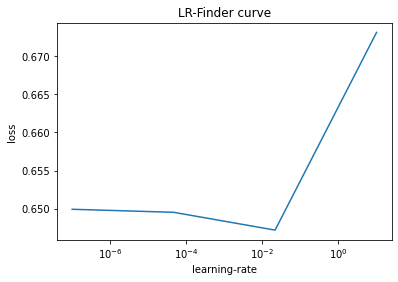

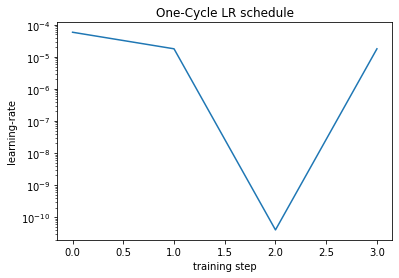

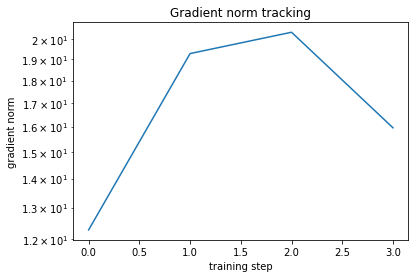

Model parameters saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/test/stages/c83be2315bd1ee212134a0d1d99aecafdab2e6bf426c88b358c5c7373f606346/trained_params.pth


Validation loss,▁▁▅█
accuracy/SIS_10e10_sub_val,▁████
accuracy/conor_similar_cat_min_10e11_val_no_shear_small_high_conc.json,▁▁▁▁▁
f1/SIS_10e10_sub_val,█▁▁▁▁
f1/conor_similar_cat_min_10e11_val_no_shear_small_high_conc.json,█▁▁▁▁
learning_rate,█▃▁▃▃
loss,▅█▃▁▁
loss/SIS_10e10_sub_val,▁▁▄██
loss/conor_similar_cat_min_10e11_val_no_shear_small_high_conc.json,▁▁▅██
precision/SIS_10e10_sub_val,█▁▁▁▁
precision/conor_similar_cat_min_10e11_val_no_shear_small_high_conc.json,█▁▁▁▁


should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Live metrics saved.
Loading paramters of the current stage, not the parent. This mode is intended for using an already trained stage for some evaluations
Training completed metrics saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/test/stages/c83be2315bd1ee212134a0d1d99aecafdab2e6bf426c88b358c5c7373f606346/training_completed_metrics.json


TrainingCompletedMetrics(accuracy={}, f1_score={}, precision={}, recall={})

In [1]:
from substructure_classifier.training_stage_development import Stage
from substructure_classifier.substructure_classifier_development import SubstructureClassifier


example_config=Stage.get_example_config(return_config=True)
my_classifier=SubstructureClassifier("test")

example_config["training_catalog"]="conor_similar_cat_min_10e11_val_no_shear_small_high_conc.json"
example_config["validation_like_train_catalog"]="conor_similar_cat_min_10e11_val_no_shear_small_high_conc.json"
example_config["dataset_class_str"]="SingleTelescopeNoiseDataset"
example_config["dataset_config"]={
        "grid_width_arcsec":8.0,
        "grid_pixel_side":100,
        "broadcasting":False,
        "sky_level":0.05,
        "kernel_size":5,
        "kernel_sigma":1.0,
        "gain":100.0,
        "final_transform": True
}

example_config["samples_used_for_training"]=1000
example_config["samples_used_for_validation"]=3000
example_config["batch_size"]=256
example_config["jump_batch_val"]=1
example_config["learning_rate"]=0.001
example_config["epochs"]=1
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=True)
